In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [51]:
# Sample dataset: Weather conditions and playing decision
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Windy": ["False", "True", "False", "False", "False", "True", "True", "False", "False", "False", "True", "True", "False", "True"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

In [52]:
# Convert categorical data to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(data)
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])  # Convert strings to numbers


In [53]:
# Split dataset into features and labels
X = df.drop(columns=["Play"])  # Features
y = df["Play"]                 # Target variable

In [54]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Create ID3 Decision Tree model
model = DecisionTreeClassifier(criterion="entropy")  # ID3 uses entropy
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [56]:
# Predict on test set
y_pred = model.predict(X_test)

In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


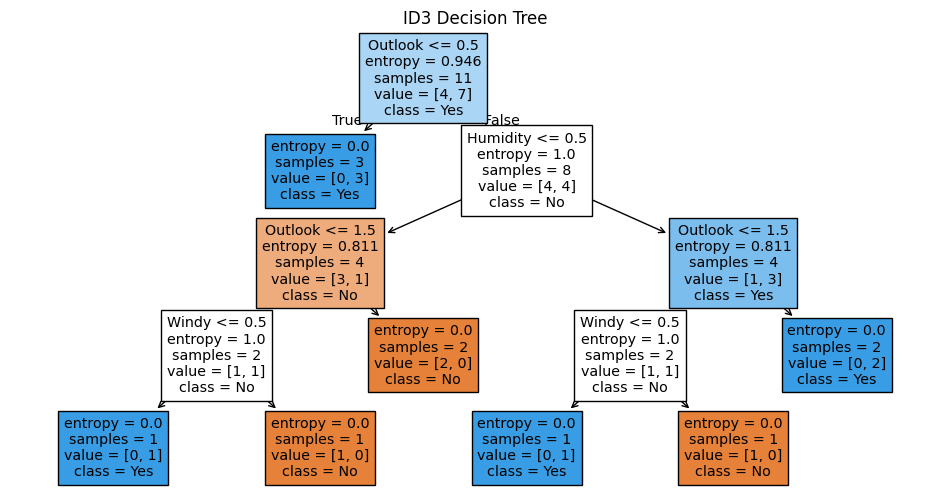

In [58]:
# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("ID3 Decision Tree")
plt.show()